<a href="https://github.com/theonaunheim">
    <img style="border-radius: 100%; float: right;" src="static/strawberry_thief_square.png" width=10% alt="Theo Naunheim's Github">
</a>

<br style="clear: both">
<hr>
<br>

<h1 align='center'>Loading and Exploring</h1>

<br>

<div style="display: table; width: 100%">
    <div style="display: table-row; width: 100%;">
        <div style="display: table-cell; width: 50%; vertical-align: middle;">
            <img src="static/loading.png" width="300">
        </div>
        <div style="display: table-cell; width: 10%">
        </div>
        <div style="display: table-cell; width: 40%; vertical-align: top;">
            <blockquote>
                <p style="font-style: italic;">“It is a capital mistake to theorize before one has data. Insensibly one begins to twist facts to suit theories, instead of theories to suit facts.”</p>
                <br>
                <p>— Sherlock Holmes</p>
                <br>
            </blockquote>
        </div>
    </div>
</div>

<br>

<div align='left'>

Image courtesy of <a href='https://commons.wikimedia.org/wiki/File:New_Zealand_RP-7.1_(right).svg'>The New Zealand Transport Authority</a>, released into the public domain.

<hr>

# Generally

Like most things, loading data in Python goes much more smoothly if you can get it right the first time. Consequently, we are going to focus on mechanisms for loading data first, and then later work on how to _munge_ that data.

> “**Data wrangling**, sometimes referred to as **data munging**, is the process of transforming and mapping data from one ‘raw’ data form into another format with the intent of making it more appropriate and valuable for a variety of downstream purposes such as analytics.”¹

Pandas has a large number of  [supported input types](https://pandas.pydata.org/pandas-docs/stable/io.html), but most of our work will be done through the workhouse [read_csv()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html#pandas.read_csv) function, the accompanying [read_excel()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_excel.html) function, and assorted [DataFrame construction methods](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html).

---
¹Wikipedia contributors, “Data wrangling,” Wikipedia, The Free Encyclopedia, https://en.wikipedia.org/w/index.php?title=Data_wrangling&oldid=834062041 (accessed May 16, 2018).

---

# Modules covered

### Standard Library
* [csv](https://docs.python.org/3.4/library/csv.html)
* [pathlib](https://docs.python.org/3/library/pathlib.html)

### Third-Party Libraries
* [chardet](http://chardet.readthedocs.io/en/latest/usage.html)
* [numpy](https://docs.scipy.org/doc/numpy-1.13.0/reference/)
* [pandas](https://pandas.pydata.org/)
* [tabulate](https://tabulate.readthedocs.io/en/latest/)


# Modules not covered

### Standard Library
* None

### Third-Party Libraries
* None

---

In [11]:
# stdlib imports
import csv
import pathlib

# Third-party imports
import chardet

import numpy as np
import pandas as pd

# The Wide, Wonderful, Wacky World of Filetypes

Sometimes people have access to conformant CSV files, well-structured databases, and well-kept Excel spreadsheets.

And sometimes, you get a trainwreck of a database or streams of bytes that want you to believe they’re data, but in reality just really wanna ruin your day…

### Fixed-width files

Fixed-width files are handled with [read_fwf()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_fwf.html).  You can infer columns if the file is well-structured, or specify their size with the 'widths' keyword argument. You can infer headers or specify the non-existance of headers with headers=0.

In [12]:
# Specify fixed-width file path
IRIS_FWF_PATH = './data/iris_dataset.txt'

# Sometimes people send you fixed width files...
with open(IRIS_FWF_PATH) as f:
    print(f.read(256))

# ... and you can read these with pd.read_fwf()
df = pd.read_fwf(IRIS_FWF_PATH, colspecs='infer', widths=None)
df.head(2)

  sepal_length_cm    sepal_width_cm    petal_length_cm    petal_width_cm  class
              5.1               3.5                1.4               0.2  Iris-setosa
              4.9               3                  1.4               0.2  Iris-setosa
    


,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


### Franken-CSVs

Sometimes CSVs are not really CSVs. If someone sends you a janky CSV with weird separators and line breaks, Pandas can handle it with read_csv().

In [13]:
# Specify frankencsv path.
FRANKEN_CSV_PATH = './data/website_feedback.csv'

# Sometimes people send you weird files.
with open(FRANKEN_CSV_PATH) as f:
    print(f.read(500))

# You can read these with pd.read_csv()
df = pd.read_csv(
    FRANKEN_CSV_PATH,
    sep=';',
    # Only the 'sep' argument is needed, the others are just for show.
    index_col='title',
    usecols=[0, 1, 2, 3, 4, 5],
    dtype={'category': 'category'},
    converters={'satistifaction': pd.to_numeric},
    thousands=',',
    na_values='no',
    keep_default_na=True,
    quotechar='"',
    escapechar=None,
    encoding='utf8',
    doublequote=True,
    delimiter=None,
    lineterminator=None,
    error_bad_lines=True,
    skip_blank_lines=False,
)
df.head(5)

title;url;comment;satisfaction;received;category;column_7;column_8;column_9;column_10;column_11;column_12;column_13;column_14;column_15;column_16;column_17;column_18;column_19;column_20;column_21;column_22;column_23;column_24;column_25;column_26;column_27;column_28
Town of Cary : Town Departments & Offices;http://www.townofcary.org/connect-engage/town-departments-offices;Under each dept listed they should give a contact phone number or extension number.  Should not have to go to another location


,url,comment,satisfaction,received,category
title,,,,,
Town of Cary : Town Departments & Offices,http://www.townofcary.org/connect-engage/town-...,Under each dept listed they should give a cont...,2,1/27/2017 10:05,Content/Function Requests
Town of Cary : Calendar,http://www.townofcary.org/connect-engage/calendar,I hate this feedback tab sticking into my mobi...,2,2/1/2017 20:14,Look/Feel
Town of Cary : Home,http://www.townofcary.org,NaN,1,2/3/2017 15:40,NaN
Town of Cary : Bond Park Community Center,http://www.townofcary.org/recreation-enjoyment...,NaN,5,2/2/2017 16:58,NaN
Town of Cary : Water Treatment,http://www.townofcary.org/services-publication...,NaN,4,1/30/2017 23:48,NaN


### pandas.read_csv() signature

pandas.read_csv(filepath_or_buffer, sep=', ', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=None, error_bad_lines=True, warn_bad_lines=True, skipfooter=0, skip_footer=0, doublequote=True, delim_whitespace=False, as_recarray=None, compact_ints=None, use_unsigned=None, low_memory=True, buffer_lines=None, memory_map=False, float_precision=None)

Can you remember all that? Me neither. [Read the documentation!](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html#pandas.read_csv) That’s what it’s there for!.

### Excel files

For better or worse, people use a lot of Excel. Pandas supports that (even if I personally **do not**) via [read_excel()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_excel.html).

In [14]:
# Specify Excel doc path
EXCEL_PATH = './data/greenway_analysis.xlsx'

# Sometimes people send you weird files.
with open(EXCEL_PATH, 'rb') as f:
    print(f.read(100))

# You can read these with pd.read_csv()
df = pd.read_excel(EXCEL_PATH)
df.head(3)

b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00 <\xb9.\x88\x01\x00\x00+\x06\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'


,gw_record_id,rec,seg,greenway,main_greenway,type_code,type,own,season,date,...,race,racevalue,age,agevalue,groupsize,groupsizevalue,avg_size,segment_length,facility_length,date_year
0,2462,NaN,43.0,Louis Stephens Path,Louis Stephens,P,Multi-use Path,TOC,Summer,2015-07-11,...,NaN,NaN,Adult,6.0,NaN,NaN,NaN,NaN,NaN,2015.0
1,2462,NaN,43.0,Louis Stephens Path,Louis Stephens,P,Multi-use Path,TOC,Summer,2015-07-11,...,NaN,NaN,Teen,1.0,NaN,NaN,NaN,NaN,NaN,2015.0
2,2462,NaN,43.0,Louis Stephens Path,Louis Stephens,P,Multi-use Path,TOC,Summer,2015-07-11,...,NaN,NaN,NaN,NaN,Couple,4.0,NaN,NaN,NaN,2015.0


### Read_excel() signature

pandas.read_excel(io, sheet_name=0, header=0, skiprows=None, skip_footer=0, index_col=None, names=None, usecols=None, parse_dates=False, date_parser=None, na_values=None, thousands=None, convert_float=True, converters=None, dtype=None, true_values=None, false_values=None, engine=None, squeeze=False, **kwds)

In [15]:
### Warning: opening a CSV with read_excel will fail.
# pd.read_excel('./data/requests-for-open-data.csv')

In [16]:
### Warning: opening an Excel with read_csv will fail.
# pd.read_csv('./data/greenway_analysis.xlsx')

### Other types

Remember, if you run into difficulty, see the supported types or build something from scratch.

* pd.read_clipboard()
* pd.read_gbq()
* pd.read_hdf()
* pd.read_html()
* pd.read_json()
* pd.read_sas()
* pd.read_sql()
* pd.read_stata()
* pd.read_table()

And you can also build dataframes from scratch with raw data.

* pd.DataFrame()
* pd.DataFrame.from_dict()
* pd.DataFrame.from_records()
* pd.DataFrame.from_items()

In [17]:
pd.DataFrame({
    'Nbr': np.random.normal(1, 3, size=3),
    'Msg': ['such dataframe', 'very elegant', 'wow']
})


,Nbr,Msg
0,0.419007,such dataframe
1,0.169016,very elegant
2,-1.629454,wow


# Wrong encodings

In olden times, you didn't have to worry about [character encoding](https://en.wikipedia.org/wiki/Character_encoding), which you can think of as the manner in which bytes translate to characters. You had [ASCII](https://en.wikipedia.org/wiki/ASCII) (or if you were particularly unlucky, [EBCDIC](https://en.wikipedia.org/wiki/EBCDIC)), and you didn't have to convert things back and forth.

We are not so lucky these days, however, you have tools to deal with it. Common encodings you will come across are 'cp1252' (Windows), 'utf8' (everywhere), 'ascii' (old, but good), and 'latin-1' (evil). A [list of encodings supported out of the box in Python are here](https://docs.python.org/3/library/codecs.html#standard-encodings)

Note: both 'read_csv()' and 'to_csv()' give you the option to save or read whatever encoding you please. The default is utf8.

In [18]:
# The default encoding is utf8
df = pd.read_csv('./data/weather.csv', encoding='utf8')
df.head(5)

,County,Web Site,Notifications,User Fees
0,Adair,¯\_(ツ)_/¯,"KSHB Severe Weather Alerts--Mobile ""Coming Soon""",¯\_(?)_/¯
1,*** All Areas ***,¯\_(ツ)_/¯,¯\_(?)_/¯,None
2,*** All Areas ***,¯\_(ツ)_/¯,The Weather Channel Severe Weather Alerts,None
3,¯\_(?)_/¯,¯\_(ツ)_/¯,Wunderground.com Weather Alerts,"Free or paid membership, user can choose"
4,Andrew,¯\_(ツ)_/¯,St. Joseph News Press Severe Weather Alert Emails,None


In [19]:
# Which can cause other encodings to file
df = pd.read_csv('./data/weather.csv', encoding='cp1252')
df.head(5)

,County,Web Site,Notifications,User Fees
0,Adair,Â¯\_(ãƒ„)_/Â¯,"KSHB Severe Weather Alerts--Mobile ""Coming Soon""",Â¯\_(?)_/Â¯
1,*** All Areas ***,Â¯\_(ãƒ„)_/Â¯,Â¯\_(?)_/Â¯,None
2,*** All Areas ***,Â¯\_(ãƒ„)_/Â¯,The Weather Channel Severe Weather Alerts,None
3,Â¯\_(?)_/Â¯,Â¯\_(ãƒ„)_/Â¯,Wunderground.com Weather Alerts,"Free or paid membership, user can choose"
4,Andrew,Â¯\_(ãƒ„)_/Â¯,St. Joseph News Press Severe Weather Alert Emails,None


In [20]:
# Which can cause other encodings to file
#df = pd.read_csv('./data/weather.csv', encoding='ascii')
#df.head(5)

### How do we determine encodings?

Your first option is to always ensure you are loading from and saving to the default encoding, UTF-8. Alternatively, you can use chardet.

In [21]:
# Find all our CSVs.
cwd = pathlib.Path().cwd()
files = list(cwd.rglob('**/*.csv'))

df = pd.DataFrame()

# For each CSV
for csv_file in files:
    # Read CSV and read encoding with chardet
    with open(csv_file, 'rb') as f:
        encoding = chardet.detect(f.read())
        csv_name = csv_file.name
    # Addthe name and encoding info to dataframe
    df = df.append({
        'filename'  : csv_name,
        'encoding'  : encoding['encoding'],
        'confidence': encoding['confidence']
    }, ignore_index=True)

# Show frame
df[['filename', 'encoding', 'confidence']]

,filename,encoding,confidence
0,ascii_table.csv,ascii,1.00
1,complex_dupe.csv,ascii,1.00
2,cp1252_table.csv,Windows-1252,0.73
3,disability.csv,ascii,1.00
4,headless.csv,ascii,1.00
5,mangled_data.csv,ascii,1.00
6,weather.csv,utf-8,0.99
7,website_feedback.csv,utf-8,0.99


# Malformed files

The best laid schemes o' mice an' men often result in seriously broken CSV files. Here are a couple common scenarios that a) apply to files as a whole and b) won't be covered in our datatype-specific cleaning later on.

### No headers

Generally pandas expects that you'll have a header to name your column types. If not, no big deal.

In [22]:
# Note: the head function still works no matter what.
df = pd.read_csv('./data/headless.csv').head(2)
df

,5268,KULM WMD,DAKOTA LAKE NATIONAL WILDLIFE REFUGE,Dakota Lake National Wildlife Refuge,NWR,Easement,F,67.7652976,3.1860329044356e-005,0.0286390744971874
0,5269,KULM WMD,DAKOTA LAKE NATIONAL WILDLIFE REFUGE,Dakota Lake National Wildlife Refuge,NWR,Easement,F,81.294664,0.000038,0.031186
1,5270,KULM WMD,DAKOTA LAKE NATIONAL WILDLIFE REFUGE,Dakota Lake National Wildlife Refuge,NWR,Easement,F,105.893084,0.000050,0.037798


In [23]:
# Specify the pass headers=0 and specify the headers instead.
column_names = [
    'OBJECTID', 'COMPLEX_NAME', 'ORGANIZATION_NAME', 'UNIT_NAME', 'UNIT_TYPE', 
    'INTEREST_TYPE1', 'INTEREST_TYPE2', 'ACRES', 'SHAPE.AREA', 'SHAPE.LEN'
]

df = pd.read_csv(
    './data/headless.csv',
    header=None,
    names=column_names
)

# Alternatively
# df = pd.read_csv('./data/headless.csv', header=None)
# df.columns = column_names

df.head(3)

,OBJECTID,COMPLEX_NAME,ORGANIZATION_NAME,UNIT_NAME,UNIT_TYPE,INTEREST_TYPE1,INTEREST_TYPE2,ACRES,SHAPE.AREA,SHAPE.LEN
0,5268,KULM WMD,DAKOTA LAKE NATIONAL WILDLIFE REFUGE,Dakota Lake National Wildlife Refuge,NWR,Easement,F,67.765298,0.000032,0.028639
1,5269,KULM WMD,DAKOTA LAKE NATIONAL WILDLIFE REFUGE,Dakota Lake National Wildlife Refuge,NWR,Easement,F,81.294664,0.000038,0.031186
2,5270,KULM WMD,DAKOTA LAKE NATIONAL WILDLIFE REFUGE,Dakota Lake National Wildlife Refuge,NWR,Easement,F,105.893084,0.000050,0.037798


### Duplicate data

Often times you will have duplicate data. This can be easily rectified on a per record or per column basis.

In [24]:
# Load data
df = pd.read_csv('./data/complex_dupe.csv')
devils_lake = df[df['COMPLEX_NAME'] == 'DEVILS LAKE WMD']

devils_lake.head(3)

,OBJECTID,COMPLEX_NAME,ORGANIZATION_NAME,UNIT_NAME,UNIT_TYPE,INTEREST_TYPE1,INTEREST_TYPE2,ACRES,SHAPE.AREA,SHAPE.LEN
22,4778,DEVILS LAKE WMD,KELLYS SLOUGH NATIONAL WILDLIFE REFUGE,Kellys Slough National Wildlife Refuge,NWR,Owned,,691.162843,0.000337,0.161179
23,4778,DEVILS LAKE WMD,KELLYS SLOUGH NATIONAL WILDLIFE REFUGE,Kellys Slough National Wildlife Refuge,NWR,Owned,,691.162843,0.000337,0.161179
152,4843,DEVILS LAKE WMD,ROCK LAKE NATIONAL WILDLIFE REFUGE,Rock Lake National Wildlife Refuge,NWR,Owned,,155.516139,0.000077,0.035802


In [25]:
# We can eliminate exact row duplicates
devils_lake.drop_duplicates().head(3)

,OBJECTID,COMPLEX_NAME,ORGANIZATION_NAME,UNIT_NAME,UNIT_TYPE,INTEREST_TYPE1,INTEREST_TYPE2,ACRES,SHAPE.AREA,SHAPE.LEN
22,4778,DEVILS LAKE WMD,KELLYS SLOUGH NATIONAL WILDLIFE REFUGE,Kellys Slough National Wildlife Refuge,NWR,Owned,,691.162843,0.000337,0.161179
152,4843,DEVILS LAKE WMD,ROCK LAKE NATIONAL WILDLIFE REFUGE,Rock Lake National Wildlife Refuge,NWR,Owned,,155.516139,0.000077,0.035802
164,4849,DEVILS LAKE WMD,STUMP LAKE NATIONAL WILDLIFE REFUGE,Stump Lake National Wildlife Refuge,NWR,Owned,,2.614307,0.000001,0.006856


In [26]:
# Or for a column or set of specific columns
devils_lake.drop_duplicates(subset=['COMPLEX_NAME', 'ORGANIZATION_NAME']).head(3)

,OBJECTID,COMPLEX_NAME,ORGANIZATION_NAME,UNIT_NAME,UNIT_TYPE,INTEREST_TYPE1,INTEREST_TYPE2,ACRES,SHAPE.AREA,SHAPE.LEN
22,4778,DEVILS LAKE WMD,KELLYS SLOUGH NATIONAL WILDLIFE REFUGE,Kellys Slough National Wildlife Refuge,NWR,Owned,,691.162843,0.000337,0.161179
152,4843,DEVILS LAKE WMD,ROCK LAKE NATIONAL WILDLIFE REFUGE,Rock Lake National Wildlife Refuge,NWR,Owned,,155.516139,0.000077,0.035802
164,4849,DEVILS LAKE WMD,STUMP LAKE NATIONAL WILDLIFE REFUGE,Stump Lake National Wildlife Refuge,NWR,Owned,,2.614307,0.000001,0.006856


### Unnecessary data

Don't load what you don't need.

In [27]:
# Load data
df = pd.read_csv('./data/complex_dupe.csv', usecols=['OBJECTID','COMPLEX_NAME', 'ORGANIZATION_NAME'])
df.head()

,OBJECTID,COMPLEX_NAME,ORGANIZATION_NAME
0,4767,AUDUBON COMPLEX,AUDUBON NATIONAL WILDLIFE REFUGE
1,4767,AUDUBON COMPLEX,AUDUBON NATIONAL WILDLIFE REFUGE
2,4768,VALLEY CITY WMD,BALDHILL DAM NATIONAL FISH HATCHERY
3,4768,VALLEY CITY WMD,BALDHILL DAM NATIONAL FISH HATCHERY
4,4769,SOURIS RIVER BASIN COMPLEX,BUFFALO LAKE NATIONAL WILDLIFE REFUGE


### Random Garbage

Sometimes you have garbage values for no particular reason. You can manually pull those out, or you can use convenience functions.

In [28]:
df = pd.read_csv('./data/weather.csv')
df.head()

,County,Web Site,Notifications,User Fees
0,Adair,¯\_(ツ)_/¯,"KSHB Severe Weather Alerts--Mobile ""Coming Soon""",¯\_(?)_/¯
1,*** All Areas ***,¯\_(ツ)_/¯,¯\_(?)_/¯,None
2,*** All Areas ***,¯\_(ツ)_/¯,The Weather Channel Severe Weather Alerts,None
3,¯\_(?)_/¯,¯\_(ツ)_/¯,Wunderground.com Weather Alerts,"Free or paid membership, user can choose"
4,Andrew,¯\_(ツ)_/¯,St. Joseph News Press Severe Weather Alert Emails,None


In [29]:
df.head().replace(to_replace='ツ', value='._.', regex=True)

,County,Web Site,Notifications,User Fees
0,Adair,¯\_(._.)_/¯,"KSHB Severe Weather Alerts--Mobile ""Coming Soon""",¯\_(?)_/¯
1,*** All Areas ***,¯\_(._.)_/¯,¯\_(?)_/¯,None
2,*** All Areas ***,¯\_(._.)_/¯,The Weather Channel Severe Weather Alerts,None
3,¯\_(?)_/¯,¯\_(._.)_/¯,Wunderground.com Weather Alerts,"Free or paid membership, user can choose"
4,Andrew,¯\_(._.)_/¯,St. Joseph News Press Severe Weather Alert Emails,None


In [30]:
# You an also find the lines for specific garbage using this idiom
df[(df == r'¯\_(?)_/¯').any(axis=1)]

# # NOT REQUIRED, but parsing this out ...
# # Get whether each cell is equal to the value
# eq_to_df = df == r'¯\_(?)_/¯'
# # Get whether each row contains a cell equal to the value
# row_contains_bool = eq_to_df.any(axis=1)
# # Get those rows where the condition is true.
# df_containing_bad_vals = df[row_contains]

,County,Web Site,Notifications,User Fees
0,Adair,¯\_(ツ)_/¯,"KSHB Severe Weather Alerts--Mobile ""Coming Soon""",¯\_(?)_/¯
1,*** All Areas ***,¯\_(ツ)_/¯,¯\_(?)_/¯,None
3,¯\_(?)_/¯,¯\_(ツ)_/¯,Wunderground.com Weather Alerts,"Free or paid membership, user can choose"
5,Andrew,¯\_(ツ)_/¯,¯\_(?)_/¯,None
6,Andrew,¯\_(ツ)_/¯,KCTV Severe Weather Text Alerts,¯\_(?)_/¯
7,Andrew,¯\_(ツ)_/¯,¯\_(?)_/¯,None
9,¯\_(?)_/¯,¯\_(ツ)_/¯,Kansas City Star Severe Weather Alerts,None
11,Audrain,¯\_(ツ)_/¯,¯\_(?)_/¯,None
12,Audrain,¯\_(ツ)_/¯,Textcaster Severe Weather Alerts,¯\_(?)_/¯


# Absurdly large files

Python is generally pretty efficient when it comes to packing a lot of data into a very small space. That said, RAM can be a limitation. If you cannot fit your file into RAM, you have a variety of options.

### Chunking (preferred)

You can break off bits of a dataframe at a time using the "chunksize" option.

In [31]:
chunk_count = 0

for chunk in pd.read_csv('./data/weather.csv', chunksize=100):
    chunk_count += 1
    print('The first cell in chunk {} is {}'.format(chunk_count, chunk.iloc[0,0]))

chunk.head()

The first cell in chunk 1 is Adair
The first cell in chunk 2 is Cole
The first cell in chunk 3 is Lincoln
The first cell in chunk 4 is Pulaski


,County,Web Site,Notifications,User Fees
300,Pulaski,¯\_(ツ)_/¯,KY3 Severe Weather Warnings,None
301,Pulaski,¯\_(ツ)_/¯,KSPR Severe Weather Warnings,None
302,Putnam,¯\_(ツ)_/¯,Emergency Email Severe Weather Alerts,None
303,Ralls,¯\_(ツ)_/¯,WGEM Severe Weather Alerts,None
304,Ralls,¯\_(ツ)_/¯,Textcaster Severe Weather Alerts,None


### Offset / nrows

You can read a limited number of rows.

In [32]:
pd.read_csv('./data/weather.csv', nrows=100, skiprows=300)

,Pulaski,¯\_(ツ)_/¯,KOMU Severe Weather Warnings,None
0,Pulaski,¯\_(ツ)_/¯,KY3 Severe Weather Warnings,None
1,Pulaski,¯\_(ツ)_/¯,KSPR Severe Weather Warnings,None
2,Putnam,¯\_(ツ)_/¯,Emergency Email Severe Weather Alerts,None
3,Ralls,¯\_(ツ)_/¯,WGEM Severe Weather Alerts,None
4,Ralls,¯\_(ツ)_/¯,Textcaster Severe Weather Alerts,None
5,Randolph,¯\_(ツ)_/¯,KOMU Severe Weather Warnings,None
6,Randolph,¯\_(ツ)_/¯,KMIZ Severe Weather Alerts,None/Standard Messaging Data Rates
7,Randolph,¯\_(ツ)_/¯,Code Red Severe Weather Alerts,None
8,Ray,¯\_(ツ)_/¯,"KSHB Severe Weather Alerts--Mobile ""Coming Soon""",None
9,Ray,¯\_(ツ)_/¯,KCTV Weather Text Alerts,None


### Out-of-core

There are a variety of other tactics, such as using third party libraries for lazy evalution (dask), using disk/dbs as cache, or key ranges.

# Exploring

There are books devoted to exploratory data analysis (EDA). Here are some quick tips you might use.

In [33]:
df = pd.read_excel('./data/greenway_analysis.xlsx')
df.head(3)

,gw_record_id,rec,seg,greenway,main_greenway,type_code,type,own,season,date,...,race,racevalue,age,agevalue,groupsize,groupsizevalue,avg_size,segment_length,facility_length,date_year
0,2462,NaN,43.0,Louis Stephens Path,Louis Stephens,P,Multi-use Path,TOC,Summer,2015-07-11,...,NaN,NaN,Adult,6.0,NaN,NaN,NaN,NaN,NaN,2015.0
1,2462,NaN,43.0,Louis Stephens Path,Louis Stephens,P,Multi-use Path,TOC,Summer,2015-07-11,...,NaN,NaN,Teen,1.0,NaN,NaN,NaN,NaN,NaN,2015.0
2,2462,NaN,43.0,Louis Stephens Path,Louis Stephens,P,Multi-use Path,TOC,Summer,2015-07-11,...,NaN,NaN,NaN,NaN,Couple,4.0,NaN,NaN,NaN,2015.0


In [34]:
# Remember, the return values are regular Python objects, so you can do whatever.
greenway_names = df['main_greenway'].unique()
path_names = [item for item in greenway_names if 'path' in item.lower()]
path_names

['New Hope Church Path',
 'Kildaire Farm Path',
 'Morrisville Parkway Path',
 'Davis Drive Path South',
 'Green Level Church Path',
 'Highcroft Path',
 'Davis Drive Path North']

In [35]:
# Datatypes: You can check a dataframe or series dtype with .dtypes
df.dtypes.head(5)

gw_record_id       int64
rec              float64
seg              float64
greenway          object
main_greenway     object
dtype: object

In [36]:
# Describe will give you information about the numeric types.
df.describe()

,gw_record_id,rec,seg,time,temp,travelmodevalue,total,gendervalue,racevalue,agevalue,groupsizevalue,avg_size,segment_length,facility_length,date_year
count,35407.000000,30509.000000,34753.000000,34921.000000,0.0,8701.000000,8701.000000,4852.000000,4553.000000,6423.000000,5727.000000,1233.000000,2540.000000,2533.000000,35045.000000
mean,1286.389895,1108.566226,32.875867,3.463274,NaN,6.949776,6.949776,12.111088,13.129585,9.250506,10.387288,3.293593,1.023228,2.376246,2010.703695
std,733.881501,630.717085,20.098994,1.663529,NaN,11.730357,11.730357,15.980476,22.785841,17.522597,13.205389,1.201906,0.355458,3.463117,2.291339
min,1.000000,1.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,-4.000000,0.000000,-21.000000,0.000000,0.450000,0.450000,2007.000000
25%,658.000000,569.000000,14.000000,2.000000,NaN,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,3.000000,0.730000,0.780000,2009.000000
50%,1286.000000,1112.000000,33.000000,4.000000,NaN,3.000000,3.000000,6.000000,5.000000,3.000000,6.000000,3.000000,0.950000,1.070000,2011.000000
75%,1919.000000,1645.000000,51.000000,5.000000,NaN,7.000000,7.000000,15.000000,13.000000,8.000000,13.000000,4.000000,1.270000,1.810000,2012.000000
max,2600.000000,2198.000000,64.000000,6.000000,NaN,221.000000,221.000000,210.000000,362.000000,313.000000,281.000000,17.000000,3.600000,13.500000,2016.000000


In [37]:
# Alternatively, you can get these individually.
df.median()

gw_record_id       1286.00
rec                1112.00
seg                  33.00
time                  4.00
temp                   NaN
travelmodevalue       3.00
total                 3.00
gendervalue           6.00
racevalue             5.00
agevalue              3.00
groupsizevalue        6.00
avg_size              3.00
segment_length        0.95
facility_length       1.07
date_year          2011.00
dtype: float64

In [38]:
# Or examine the compnent column series individually
df['age']

0         Adult
1          Teen
2           NaN
3           NaN
4           NaN
5           NaN
6           NaN
7           NaN
8         Adult
9           NaN
10          NaN
11          NaN
12          NaN
13          NaN
14          NaN
15          NaN
16          NaN
17          NaN
18          NaN
19          NaN
20          NaN
21          NaN
22          NaN
23          NaN
24          NaN
25          NaN
26          NaN
27          NaN
28          NaN
29          NaN
          ...  
35377     Child
35378       NaN
35379       NaN
35380       NaN
35381     Child
35382       NaN
35383       NaN
35384       NaN
35385       NaN
35386       NaN
35387       NaN
35388      Teen
35389       NaN
35390      Teen
35391     Adult
35392       NaN
35393       NaN
35394       NaN
35395       NaN
35396       NaN
35397    Senior
35398       NaN
35399       NaN
35400       NaN
35401       NaN
35402       NaN
35403      Baby
35404     Child
35405       NaN
35406       NaN
Name: age, Length: 35407

In [39]:
# Info will give you information about the values stored.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35407 entries, 0 to 35406
Data columns (total 30 columns):
gw_record_id       35407 non-null int64
rec                30509 non-null float64
seg                34753 non-null float64
greenway           35407 non-null object
main_greenway      35407 non-null object
type_code          35315 non-null object
type               35315 non-null object
own                33959 non-null object
season             35120 non-null object
date               35045 non-null datetime64[ns]
day                35115 non-null object
time               34921 non-null float64
hour               35100 non-null object
temp               0 non-null float64
air_quality        6441 non-null object
travelmode         8701 non-null object
travelmodevalue    8701 non-null float64
total              8701 non-null float64
gender             4856 non-null object
gendervalue        4852 non-null float64
race               4553 non-null object
racevalue          4553 non

In [40]:
# You can use value counts to examine columns.
df['greenway'].value_counts().head()

Black Creek - Lake Crabtree    1263
Swift Creek                    1061
Black Creek - Castalia         1043
Symphony Lake                   995
White Oak - Parkway             968
Name: greenway, dtype: int64

In [41]:
# You can get correlation, etc.
df = pd.read_fwf(IRIS_FWF_PATH, colspecs='infer', widths=None)
df.corr()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
sepal_length_cm,1.000000,-0.109369,0.871754,0.817954
sepal_width_cm,-0.109369,1.000000,-0.420516,-0.356544
petal_length_cm,0.871754,-0.420516,1.000000,0.962757
petal_width_cm,0.817954,-0.356544,0.962757,1.000000


C:\Users\theon\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  after removing the cwd from sys.path.


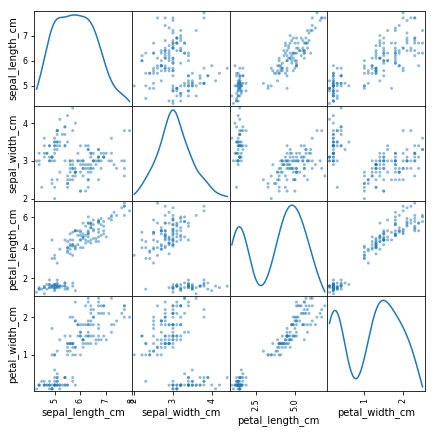

In [42]:
# Which as an aside looks way cooler as a scatter matrix
import matplotlib
%matplotlib inline
pd.tools.plotting.scatter_matrix(df, figsize=(7,7), diagonal='kde');

# Additional Learing Resources

* ### [10 Minutes to Pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html)
* ### [Pandas Tutorials](https://pandas.pydata.org/pandas-docs/stable/tutorials.html)
* ### [Pandas Cookbook](https://pandas.pydata.org/pandas-docs/stable/tutorials.html#pandas-cookbook)
* ### [Pandas Guide for New Users](https://pandas.pydata.org/pandas-docs/stable/tutorials.html#lessons-for-new-pandas-users)
* ### [Pandas Intro to Data Structures](https://pandas.pydata.org/pandas-docs/stable/dsintro.html)

---

# Next Up: [Missing Data](3_missing_data.ipynb)

<br>

<img style="margin-left: 0;" src="static/empty_set.png">

<br>

<div align='left'>
    Image courtesy of <a href='https://commons.wikimedia.org/wiki/File:Empty_set.svg'>Octahedron80</a>, released into the public domain
</div>

---